In [43]:
## import packages

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#display indoc charts
%matplotlib inline

In [4]:
#read in cleaned data comparing proportion
FCC_pop_comments_perc2 =pd.read_csv('FCC_pop_comments_perc2.csv')

In [5]:
#explore dataframe
FCC_pop_comments_perc2.head()

,POPESTIMATE2016,perc_pop_of_nation,name,abbreviation,State_Abbreviation,filers,perc_comments_of_total,perc_comments_to_state,diff_perc_pop_comments
0,4863300,1.51,Alabama,AL,AL,34193.0,1.47,0.70,0.04
1,741894,0.23,Alaska,AK,AK,5305.0,0.23,0.72,0.00
2,6931071,2.14,Arizona,AZ,AZ,44482.0,1.91,0.64,0.23
3,2988248,0.92,Arkansas,AR,AR,18193.0,0.78,0.61,0.14
4,39250017,12.15,California,CA,CA,272223.0,11.71,0.69,0.44


## Evaluate the difference between the proportion of comments filed, within each state, to the proportion of the estimated 2016 US population of each state

### A paired t-test can determine if the mean difference between these paired observations (state by state pairing) is significant

### H0: The mean difference between paired observations in the population is zero
### H1: The mean difference between paired observations in the population is not zero

Text(0.5,1,'Distribution of differences by state')

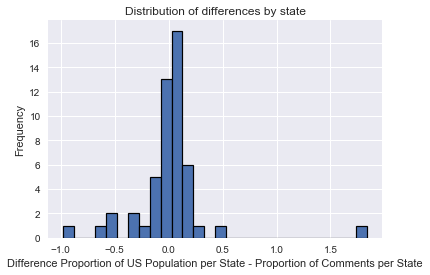

In [41]:
#Plot the histogram of differences

sns.set()
plt.hist(FCC_pop_comments_perc2['diff_perc_pop_comments'],bins=28, edgecolor='black', linewidth=1.2)
plt.xlabel('Difference Proportion of US Population per State - Proportion of Comments per State')
plt.ylabel('Frequency')
plt.title('Distribution of differences by state')

In [47]:
# a is the percentage of the US population in each state (estimated 2016)
a = FCC_pop_comments_perc2['perc_pop_of_nation']
# b is the percentage of the comments filed in that state (3million sample from 22million comments)
b = FCC_pop_comments_perc2['perc_comments_of_total']

In [68]:
#mean % of population state
US_pop_mean = FCC_pop_comments_perc2['perc_pop_of_nation'].mean()
US_pop_mean

1.9601960784313726

In [67]:
#mean % of population state
comments_mean = FCC_pop_comments_perc2['perc_comments_of_total'].mean()
comments_mean

1.9603921568627451

In [65]:
US_pop_std = FCC_pop_comments_perc2['perc_pop_of_nation'].std()
US_pop_std

2.2422394967496926

In [60]:
conf_int = np.percentile(FCC_pop_comments_perc2['diff_perc_pop_comments'], [2.5,97.5])
conf_int

array([-0.6425,  0.3875])

In [48]:
## Calculate the Standard Deviation
#Calculate the variance to get the standard deviation

#For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)

#std deviation
s = np.sqrt((var_a + var_b)/2)
s

2.1850228607410003

In [52]:
#Sample size (population size?)
N=51

## Calculate the t-statistics
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))
t

-0.00045315202910101783

In [53]:
## Compare with the critical t-value
#Degrees of freedom
df = 2*N - 2
df

100

In [54]:
#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)
p

0.50018033011584961

In [55]:
print("t = " + str(t))
print("p = " + str(2*p))
#Note that we multiply the p value by 2 because its a twp tail t-test
### You can see that after comparing the t statistic with the critical t value (computed internally)
# we get a good p value of 0.0005 and thus we reject the null hypothesis and 
# thus it proves that the mean of the two distributions are different and statistically significant.


t = -0.000453152029101
p = 1.00036066023


In [56]:
## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(2*p2))

t = -0.0004531520291
p = 1.99927867954
